In [2]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools

In [3]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [4]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [5]:
plt.rcParams.update({'font.size': 18})

In [6]:
color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

In [7]:
results_all = pd.read_csv('results_0_30_noferry.csv')
results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
cols = results_all.columns.tolist()
cols.insert(0, cols.pop(cols.index('region')))
results_all = results_all.reindex(columns=cols)
results_201905R = results_all[results_all['model'] == '201905R']
results_202111 = results_all[results_all['model'] == '202111']

In [8]:
results_best = results_202111.drop(columns=['model','number'])
regions = results_202111.region.to_list()
for metric in results_best.columns[1:]:
    results_best[metric] = compile_compare(results_201905R, results_202111, metric, regions)
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,202111,202111,202111,202111,201905R,201905R,202111,202111,201905R
12,Skagit,202111,201905R,201905R,202111,202111,202111,202111,201905R,202111
13,Snohomish,201905R,202111,202111,202111,201905R,201905R,201905R,202111,201905R
14,Nisqually,201905R,202111,202111,202111,202111,202111,202111,202111,202111
15,Elwha,201905R,202111,202111,202111,202111,202111,202111,202111,202111
16,Cowichan,202111,202111,202111,202111,202111,202111,202111,202111,202111
17,Nanaimo,202111,202111,202111,202111,202111,202111,202111,202111,202111
18,Puntledge,201905R,201905R,202111,201905R,201905R,201905R,201905R,202111,201905R
19,Salmon,201905R,201905R,201905R,201905R,201905R,201905R,201905R,201905R,201905R
20,Homathko,202111,202111,202111,202111,202111,202111,202111,202111,202111


Text(0.5, 1.0, 'Number of Obs Per Region')

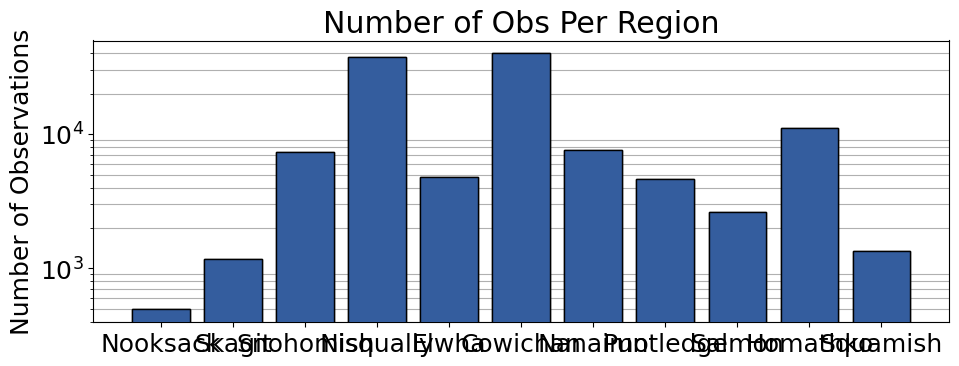

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

ax.grid(axis='y', which='minor', zorder=0)
# ax.scatter(results_all['region'], results_all['number'])
ax.bar(results_all['region'], results_all['number'], color=color3, edgecolor='k', zorder=3)
ax.set_yscale('log')

ax.set_ylabel(r'Number of Observations')
ax.set_title('Number of Obs Per Region')

bias improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


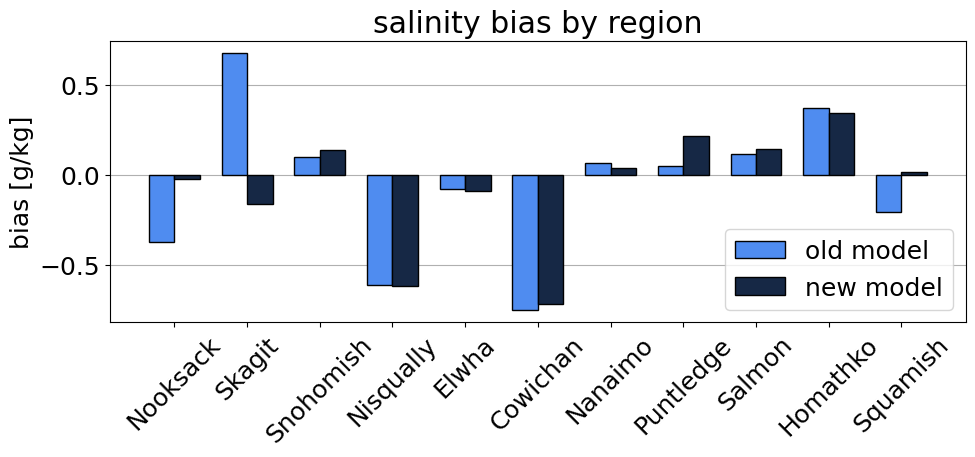

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'bias'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='old model', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='new model', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel('{} [g/kg]'.format(metric))
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


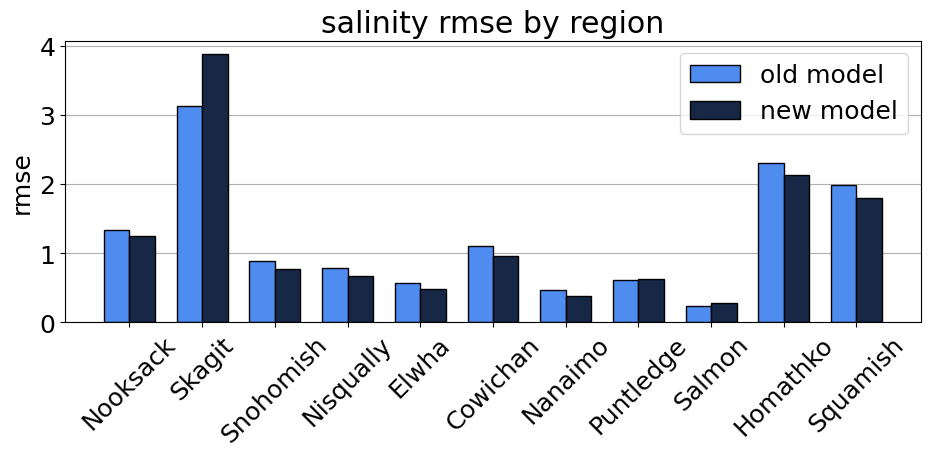

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'rmse'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='old model', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='new model', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel('{}'.format(metric))
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


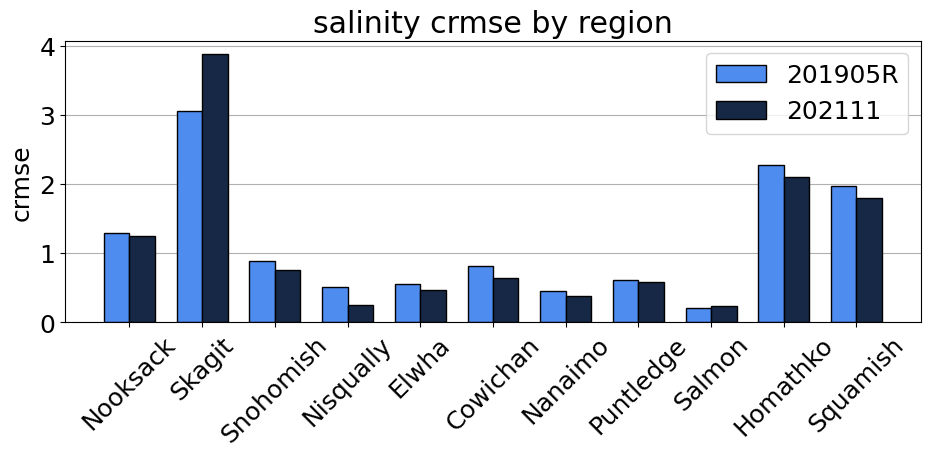

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'crmse'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_crmse_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


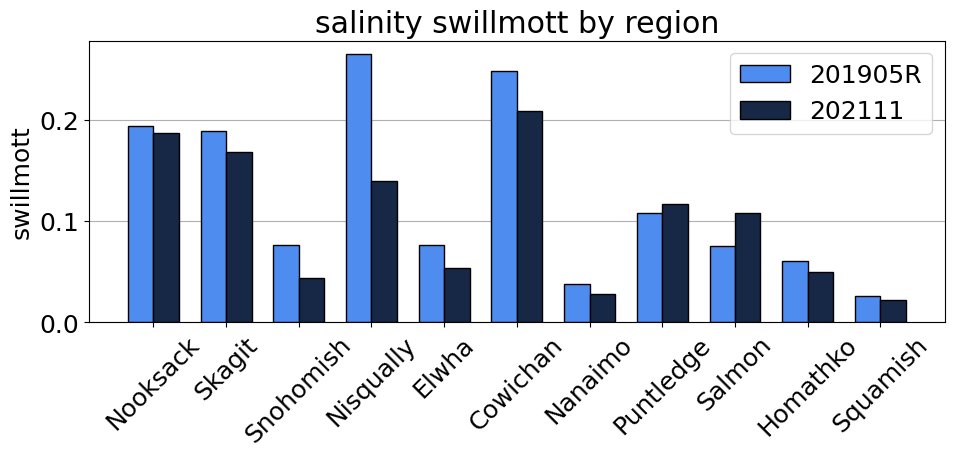

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'swillmott'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_swillmott_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


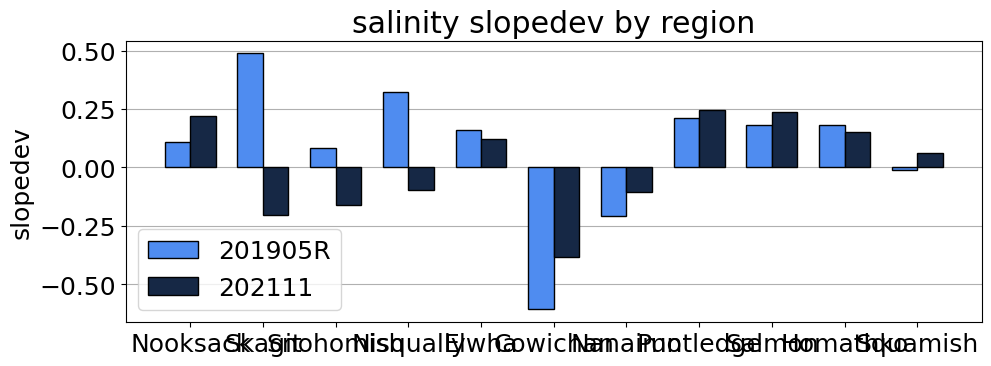

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'slopedev'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


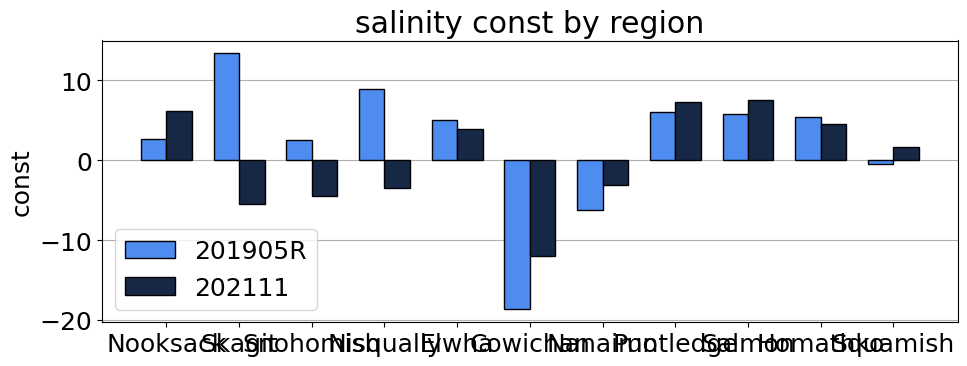

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'const'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_const_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


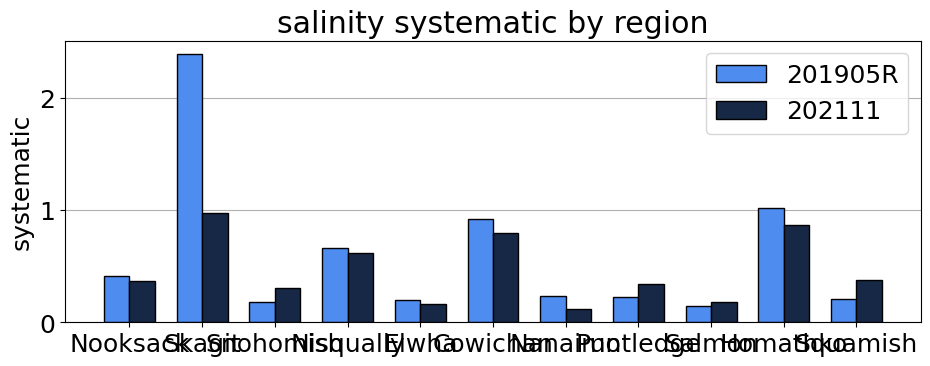

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'systematic'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_systematic_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


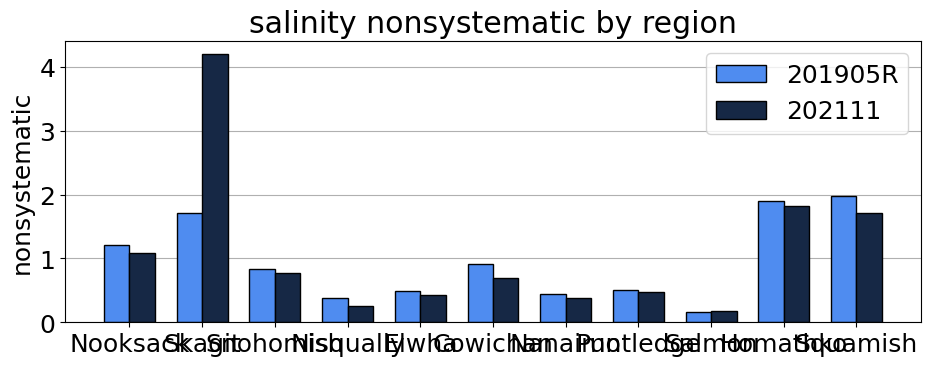

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'nonsystematic'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_nonsystematic_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


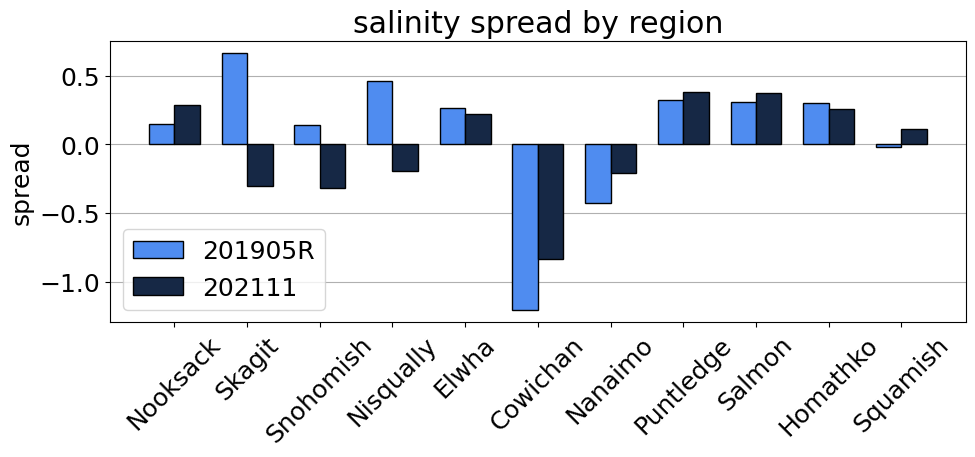

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'spread'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_spread_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

bias improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Homathko, Squamish


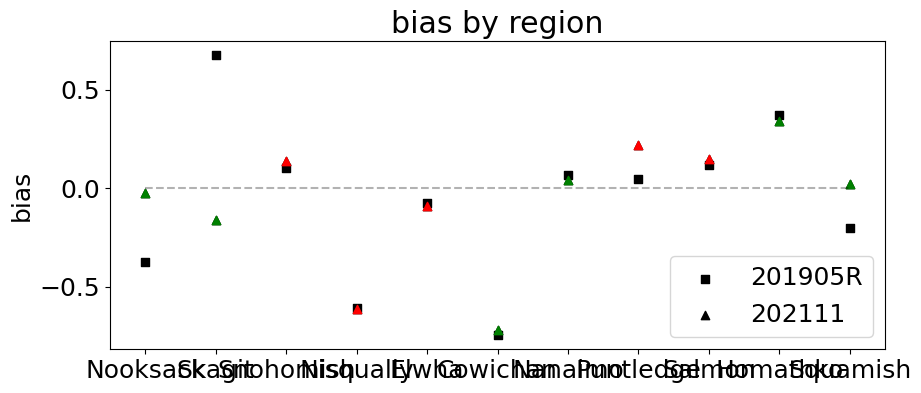

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'bias'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_bias_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


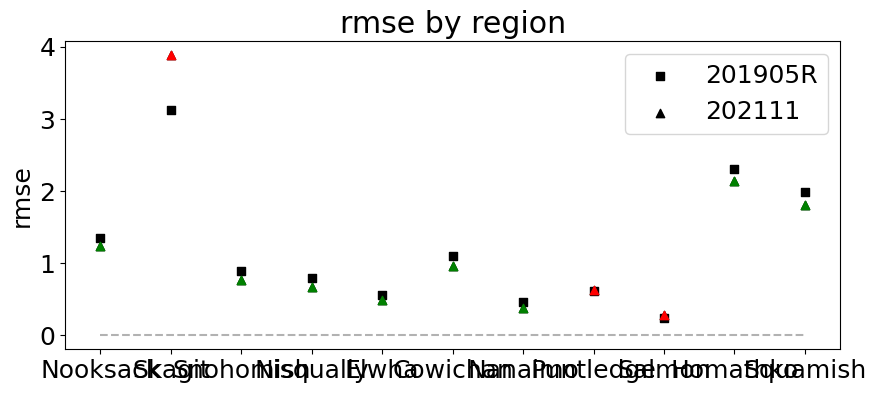

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'rmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_rmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


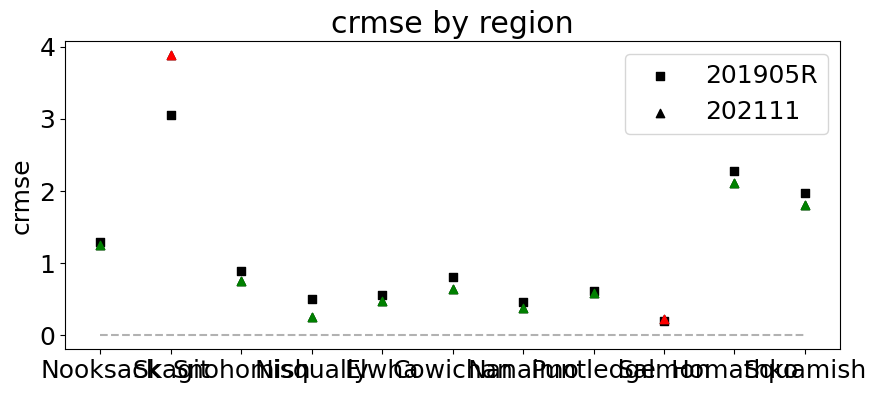

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'crmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_crmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


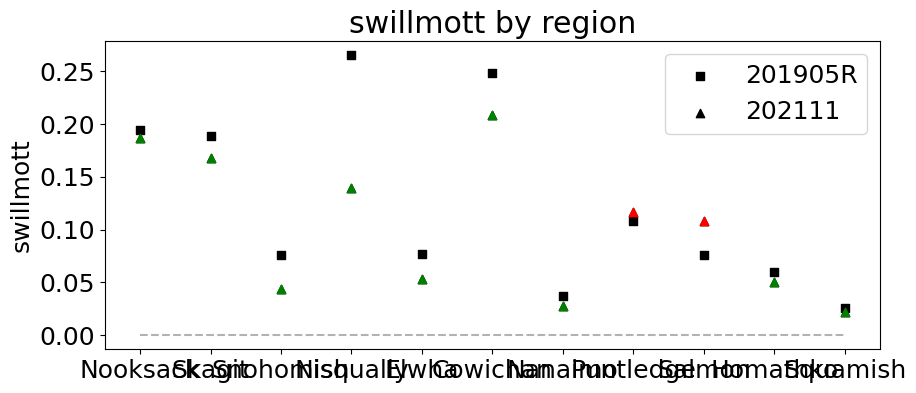

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'swillmott'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_swillmott_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


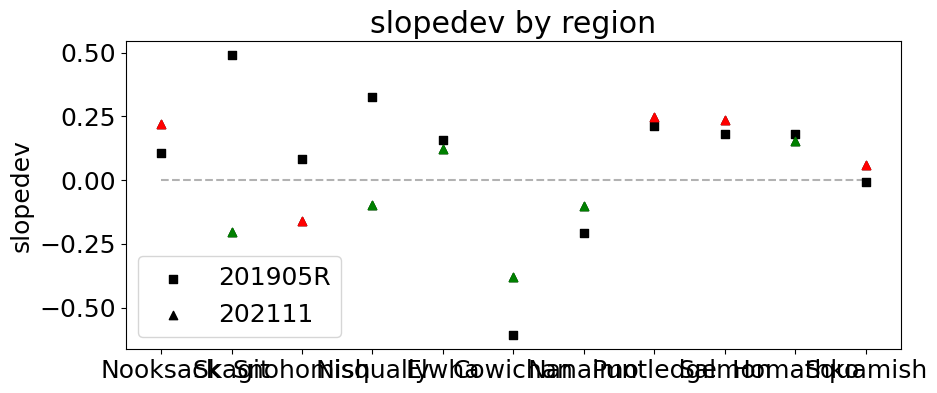

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'slopedev'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_slopedev_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


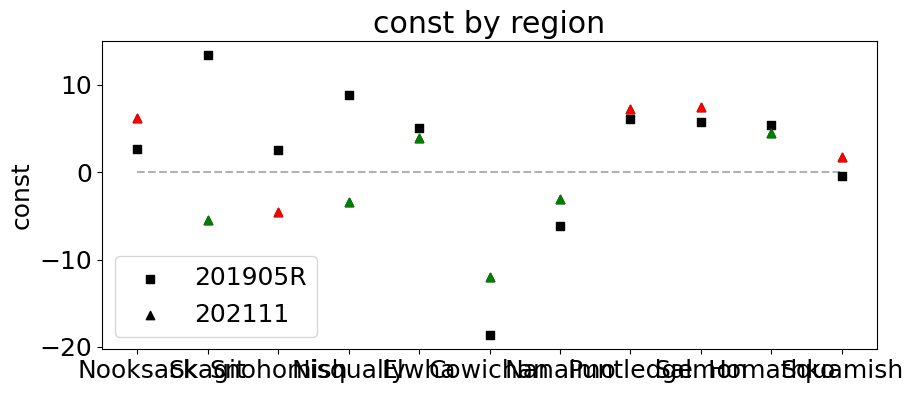

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'const'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_const_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


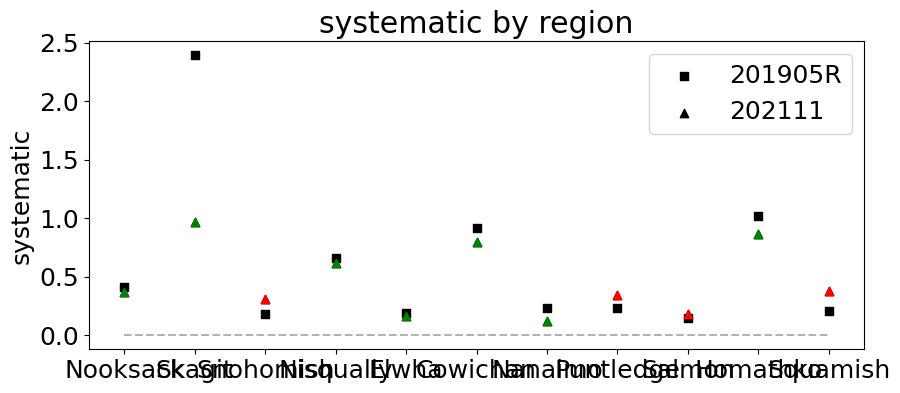

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'systematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_systematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


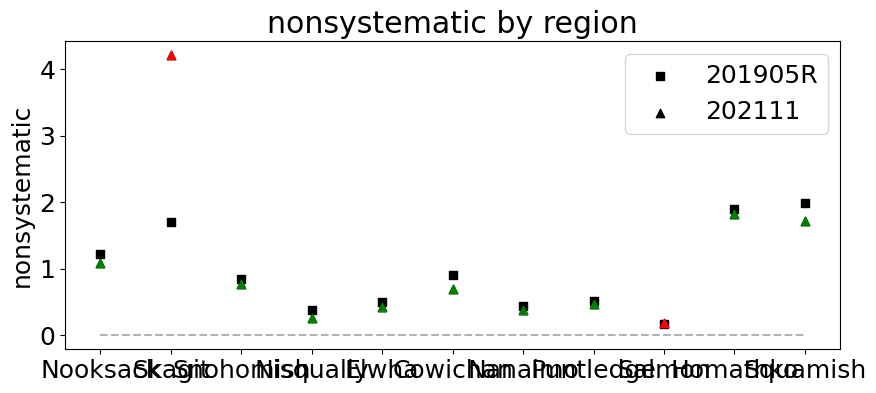

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'nonsystematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_nonsystematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


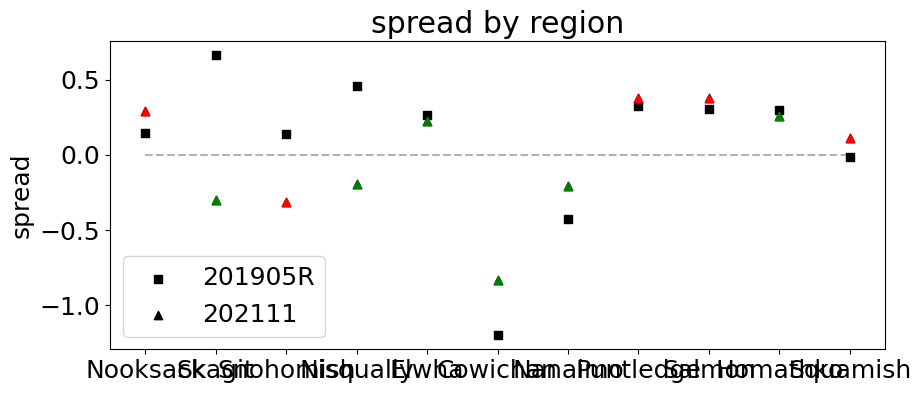

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'spread'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

# ax.set_ylim([-1.5, 1.5])  # cropping the nanaimo data which includes all of the ferry data


plt.savefig('stats_spread_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)